<a href="https://colab.research.google.com/github/nipunikajain/DeepLearning1/blob/main/Onehot_Encoding_and_Cross_Entropy_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding Onehot Encoding and Cross Entropy in PyTorch
**bold text**

In [3]:
import torch

#### One-hot encoding

In [4]:
def to_onehot(y, num_classes):
  y_onehot = torch.zeros(y.size(0), num_classes)
  y_onehot.scatter_(1,y.view(-1,1).long(),1).float()
  return y_onehot

y=torch.tensor([0,1,2,2])
y_enc = to_onehot(y,3)

print('one-hot encoding:\n', y_enc)

one-hot encoding:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])


### Softmax

Suppose we have some net inputs Z, where each row is one training example:

In [5]:
z = torch.tensor([[-0.3,  -0.5, -0.5],
                   [-0.4,  -0.1, -0.5],
                   [-0.3,  -0.94, -0.5],
                   [-0.99, -0.88, -0.5]])

z

tensor([[-0.3000, -0.5000, -0.5000],
        [-0.4000, -0.1000, -0.5000],
        [-0.3000, -0.9400, -0.5000],
        [-0.9900, -0.8800, -0.5000]])

Next, we convert them to "probabilities" via. softmax:

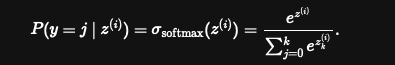

In [10]:
def softmax(z):
    return (torch.exp(z.t()) / torch.sum(torch.exp(z), dim=1)).t()

smax = softmax(z)
print('softmax:\n', smax)

softmax:
 tensor([[0.3792, 0.3104, 0.3104],
        [0.3072, 0.4147, 0.2780],
        [0.4263, 0.2248, 0.3490],
        [0.2668, 0.2978, 0.4354]])


The probabilties can then be converted back to class labels based on the largest probability in each row:



In [11]:
def to_classlabel(z):
    return torch.argmax(z, dim=1)

print('predicted class labels: ', to_classlabel(smax))
print('true class labels: ', to_classlabel(y_enc))

predicted class labels:  tensor([0, 1, 0, 2])
true class labels:  tensor([0, 1, 2, 2])


### Cross Entropy

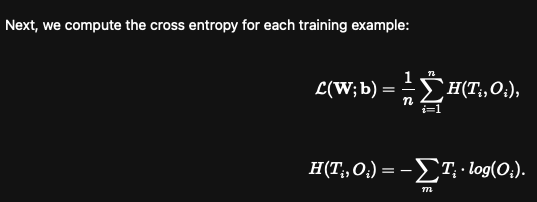

In [12]:
def cross_entropy(softmax, y_target):
    return - torch.sum(torch.log(softmax) * (y_target), dim=1)

xent = cross_entropy(smax, y_enc)
print('Cross Entropy:', xent)

Cross Entropy: tensor([0.9698, 0.8801, 1.0527, 0.8314])
